Convolutional Neural Network
==

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import RMSprop

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

it's now 3D 28x28x1 where 1 is the color channel since grayscale

In [4]:
from tensorflow.keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0],1,28,28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],1,28,28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0],28,28,1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0],28,28,1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [6]:
train_labels = tensorflow.keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = tensorflow.keras.utils.to_categorical(mnist_test_labels, 10)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


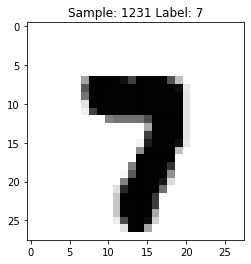

In [7]:
import matplotlib.pyplot as plt
def display_sample(num):
    #Print the one-hot array of this sample's label
    print(train_labels[num])
    label = train_labels[num].argmax(axis = 0)
    #reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()

display_sample(1231)

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3),
                activation = 'relu',
                input_shape=input_shape)) #32 fields in the image 3x3 blocks
model.add(Conv2D(64, (3,3), activation = 'relu')) #64 fields in the image 3x3 blocks
#reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2,2)))
#drop out to avoid overfitting
model.add(Dropout(0.25)) #randomly sets input units to 0 with frequency rate to prevent overfitting
#flatten results to 1 dimension
model.add(Flatten())
#one hidden layer for learning
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax')) #softmax(x_i) = exp(x_i)/sum(exp(x))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [11]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

it takes very long to run

In [ ]:
history = model.fit(train_images, train_labels,
                   batch_size = 32,
                   epochs = 10,
                   verbose = 2,
                   validation_data = (test_images, test_labels))

In [ ]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])